In [257]:
import matplotlib.pyplot as plt
import random
import numpy as np
from collections import defaultdict

# **ЛР 2.1**

In [258]:
ages = []
with open('moscow_2021.txt', 'r') as f:
    for l in f.readlines():
        ages.append(int(l.strip()))

## _Функции характеристик_

In [259]:
def init_moment_k(nums: list, k: int = 1) -> float:
    sum_k=0
    for n in nums:
        sum_k+=n**k
    return sum_k/len(nums)

def cent_moment_k(nums: list, k: int) -> float:
    dif_sum_k = 0
    mean_num = init_moment_k(nums)
    for n in nums:
        dif_sum_k+=(n-mean_num)**k
    return dif_sum_k/len(nums)

## _Функции для выборок_

In [260]:
def repeating_sample_number(stand_dev: float, precision: float, multiplicity: float) -> int:
    '''**multiplicity** means **t**
    **precision** means **delta**'''
    return int((multiplicity*stand_dev/precision)**2)


def get_sample(nums: list, sample_size: int) -> list:
    res = []
    for i in random.sample(range(0, len(nums)), sample_size):
        res.append(nums[i])
    return res

## _Работа с данными_

### Условия

$t = 1.96$ т.к. $\gamma = 0.95$

$\delta = 3\text{ года}$

Количество выборок — 36

In [261]:
precision = 3
t = 1.96
samples_number = 36

stand_deviation = cent_moment_k(ages, 2)**0.5

In [262]:
samp_size = repeating_sample_number(stand_deviation, precision, t)

sample_means = []
for _ in range(samples_number):
    sample_means.append(init_moment_k(get_sample(ages, samp_size), 1))


means_dict = defaultdict(int)
for m in sample_means:
    means_dict[int(m)]+=1

36


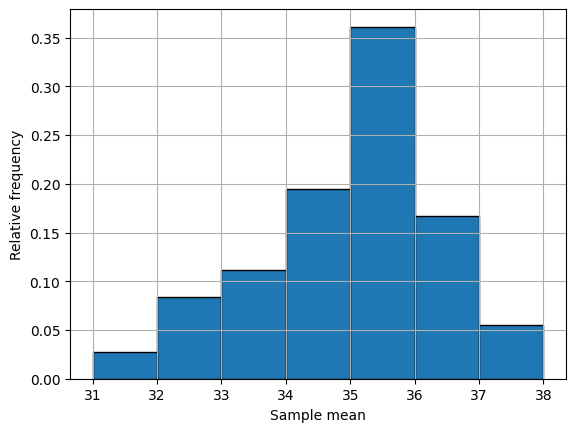

In [263]:
val, weight = zip(*[(v, w) for v, w in means_dict.items()])

print(sum(weight))

fig, ax = plt.subplots()
ax.bar(val, np.array(weight)/sum(weight), width=1, align='edge', edgecolor='black')

ax.set_xlabel('Sample mean')
ax.set_ylabel('Relative frequency')
ax.grid()